<a href="https://colab.research.google.com/github/PMacBeets/FashionCritic/blob/master/Copy_of_Copy_of_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train.shape:', x_train.shape)

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
x_train.shape: (60000, 28, 28)


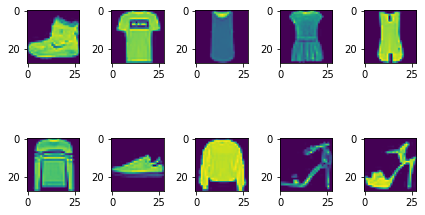

In [3]:
import matplotlib.pyplot as plt

for index in range(10):
  plt.subplot(2, 5, index+1)
  plt.imshow(x_train[index], vmin=0, vmax=255)

plt.tight_layout()

In [4]:
# Cast Data so Tf can manipulate matrices
x_train = tf.cast(x_train, dtype=tf.float32)
y_train = tf.cast(y_train, dtype=tf.int32)
x_test = tf.cast(x_test, dtype=tf.float32)
y_test = tf.cast(y_test, dtype=tf.int32)

# The raw data are in range [0, 255], we scale it to [-1, 1].
x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5

#one hot
num_class = tf.reduce_max(y_train) + 1
y_train = tf.one_hot(tf.squeeze(y_train), num_class)
y_test = tf.one_hot(tf.squeeze(y_test), num_class)



print('x_train.shape:', x_train.shape)


x_train.shape: (60000, 28, 28)


In [5]:
 # ONLY RUN ONCE!! 
    
# The data loaded from TF is in tensor format. Due to its greyscale nature, it 
# does not have the channel dimension, so we expand the data
# TF supports two image format: NCHW (channels_first) and NHWC (channels_last), both are fine.
x_train = tf.expand_dims(x_train, axis=3)  # convert to shape NHWC: 60000x28x28x1
x_test = tf.expand_dims(x_test, axis=3)
print('x_train.shape:', x_train.shape)

x_train.shape: (60000, 28, 28, 1)


In [6]:
#create basic model
from tensorflow.keras import layers

# 2.2 build the model
model = tf.keras.Sequential(name='plainCNN')
# if we want to add L2 regularization, we could pass 
# "kernel_regularizer=tf.keras.regularizers.l2(l=0.01)"
# to layers.Conv2D
model.add(layers.Conv2D(
    16, kernel_size=3, strides=2, padding='same', data_format='channels_last', 
    activation='relu', input_shape=(28,28,1), name='conv1'))
model.add(layers.Conv2D(
    32, kernel_size=3, strides=2, padding='same', data_format='channels_last', 
    activation='relu', name='conv2'))
model.add(layers.Conv2D(
    64, kernel_size=3, strides=2, padding='same', data_format='channels_last', 
    activation='relu', name='conv3'))
model.add(layers.GlobalMaxPool2D(data_format='channels_last', name='max-pool'))
model.add(layers.Dense(10, activation=None, name='output'))  # None means no activation or linear

model.summary()


Model: "plainCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 14, 14, 16)        160       
_________________________________________________________________
conv2 (Conv2D)               (None, 7, 7, 32)          4640      
_________________________________________________________________
conv3 (Conv2D)               (None, 4, 4, 64)          18496     
_________________________________________________________________
max-pool (GlobalMaxPooling2D (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 23,946
Trainable params: 23,946
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay

batch_size = 1
num_instance = 50000
# Let's say, if we want to decay the learning rate at 40, 80, 160 epochs
boundary = (40*num_instance // batch_size, 80*num_instance // batch_size, 160*num_instance // batch_size)
value = (1e-3, 3e-4, 1e-4, 3e-5)
learning_rate = PiecewiseConstantDecay(boundary, value)
print(learning_rate)

# in the loss, from_logits=True because we use linear activation at the last layer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

print('Model compiled.')

Model compiled.


In [8]:
# Train the model
epochs = 60
print(x_train.shape)
print(y_train.shape)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

(60000, 28, 28, 1)
(60000, 10)
Epoch 1/60
60000/60000 [==============================] - 117s 2ms/step - loss: 0.4520 - accuracy: 0.8389
Epoch 2/60
34949/60000 [================>.............] - ETA: 49s - loss: 0.3347 - accuracy: 0.8789

KeyboardInterrupt: ignored

In [0]:
print(y_train)


tf.Tensor([9 0 0 ... 3 0 5], shape=(60000,), dtype=int32)
